In [28]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [88]:
log_data = json.load(open('../results/log_6.json'))

In [89]:
print(f"This simulation used {log_data['total_tokens_input']} input tokens, from which {log_data['total_tokens_cached']} cached.")
print(f"This simulation used {log_data['total_tokens_output']} output tokens.")
print(f"The predicted total costs are €{log_data['predicted_cost']}")

This simulation used 388771 input tokens, from which 6784 cached.
This simulation used 19255 output tokens.
The predicted total costs are €0.06935984999999999


<BarContainer object of 25 artists>

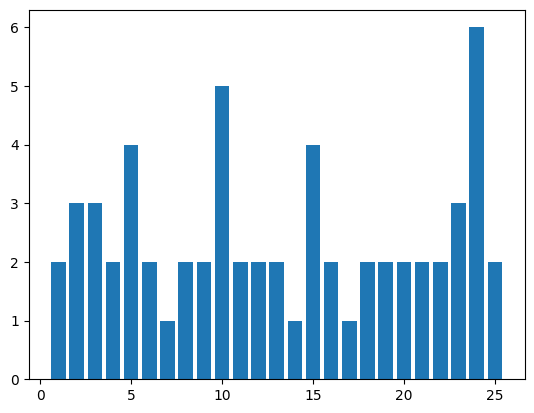

In [90]:
user_ids = [user['identifier'] for user in log_data['users']]
user_followers = [user['followers'] for user in log_data['users']]

plt.bar(user_ids, user_followers)

<BarContainer object of 192 artists>

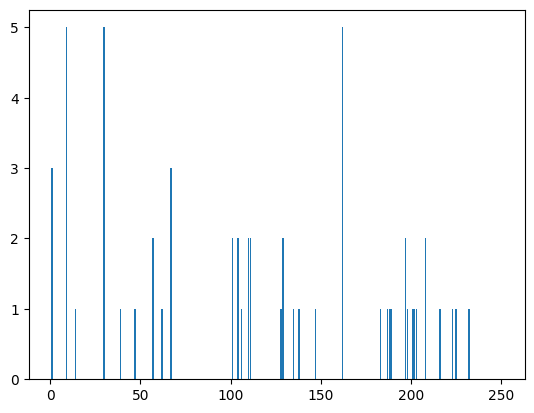

In [91]:
# TODO: for posts
post_ids = [post['post_id'] for post in log_data['raw_posts']]
post_reposters = [post['reposts'] for post in log_data['raw_posts']]

plt.bar(post_ids, post_reposters)

<BarContainer object of 25 artists>

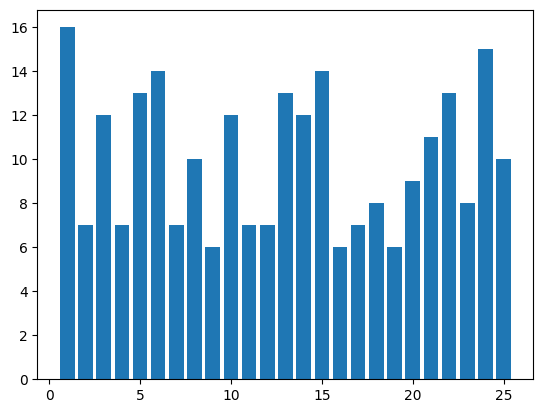

In [92]:
user_action_count = Counter([action['user_id'] for action in log_data['actions']])

plt.bar(user_action_count.keys(), user_action_count.values())

<BarContainer object of 2 artists>

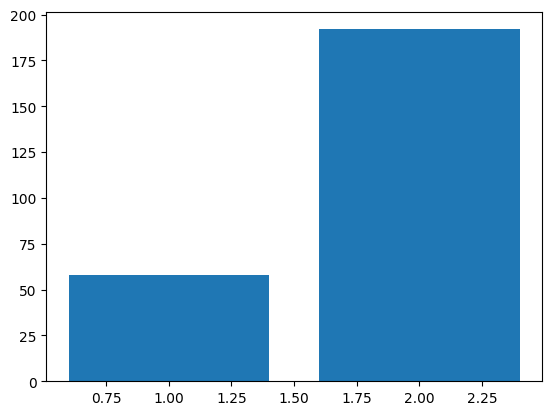

In [93]:
action_count = Counter([action['action'] for action in log_data['actions']])

plt.bar(action_count.keys(), action_count.values())

In [94]:
failed_actions = [action for action in log_data['actions'] if action['success'] == False ]

print(f"Nr of failed actions: {len(failed_actions)}")
action_nr = 0

print(failed_actions[action_nr]['action'])
print(failed_actions[action_nr]['content'])
print(failed_actions[action_nr]['user_id'])
print(failed_actions[action_nr]['prompt'])

Nr of failed actions: 0


IndexError: list index out of range

In [95]:
def show_persona(user_id, log_data):

    user = [user for user in log_data['users'] if user['identifier'] == user_id][0]

    return user['persona']['persona']

def show_repost_reason(user_id, post_id, log_data):

    actions = [action for action in log_data['actions'] if action['user_id'] == user_id and action['action'] == 1]
    action = [action for action in actions if int(action['content']) == post_id][0]

    return action['explanation']

In [96]:
for post in log_data['raw_posts']:

    if post['reposters']:
        print(post['content'], '\n')

        for reposter in post['reposters']:

            print(show_persona(reposter, log_data), '\n')

            print(show_repost_reason(reposter, post['post_id'], log_data))

        print()


It's wild to see Catholic folks pushing back against the Church on LGBT issues. Faith should spread love and acceptance, not division. Let’s keep battling for equality, folks! 

You are female.
You are never married.
You are low income.
Age: 27.
You are Protestant.
You are from Texas.
Education: High school.
You are Hispanic.
You are heterosexual.
You never talk about politics.
You didn't vote in 2020.
You prefer neither political party.
You think the most important problem facing the country is Health care.
Your occupation is a caregiver at a local nursing home.  
You like cooking traditional family recipes and spending weekends at local farmers' markets. 

Reposting an article on health IT strategies connects well with my experience as a caregiver and my concern about health care access.
You are female.
You are never married.
You are middle income.
Age: 30.
You are from Nevada.
Education: Bachelor’s degree.
You are Asian.
You are bisexual.
You never talk about politics.
You voted for